In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
overdoses = pd.read_excel('overdose_data_1999-2015.xls',sheet_name='Online',skiprows =6)
def get_data(table,rownum,title):
    data = pd.DataFrame(table.loc[rownum][2:]).astype(float)
    data.columns = {title}
    return data

In [3]:
def augment(xold,yold,numsteps):
    xnew = []
    ynew = []
    for i in range(len(xold)-1):
        difX = xold[i+1]-xold[i]
        stepsX = difX/numsteps
        difY = yold[i+1]-yold[i]
        stepsY = difY/numsteps
        for s in range(numsteps):
            xnew = np.append(xnew,xold[i]+s*stepsX)
            ynew = np.append(ynew,yold[i]+s*stepsY)
    return xnew,ynew

In [4]:
title = 'Heroin Overdoses'
d = get_data(overdoses,18,title)
x = np.array(d.index)
y = np.array(d['Heroin Overdoses'])
overdose = pd.DataFrame(y,x)
#XN,YN = augment(x,y,10)
#augmented = pd.DataFrame(YN,XN)
#overdose = augmented
overdose.columns = {title}
overdose


,Heroin Overdoses
1999,1960.0
2000,1842.0
2001,1779.0
2002,2089.0
2003,2080.0
2004,1878.0
2005,2009.0
2006,2088.0
2007,2399.0
2008,3041.0


      Heroin Overdoses
1999            1960.0
      Heroin Overdoses
1999            1960.0
      Heroin Overdoses
1999            1960.0
2000            1842.0
      Heroin Overdoses
1999            1960.0
2000            1842.0
2001            1779.0
      Heroin Overdoses
1999            1960.0
2000            1842.0
2001            1779.0
2002            2089.0
      Heroin Overdoses
1999            1960.0
2000            1842.0
2001            1779.0
2002            2089.0
2003            2080.0
      Heroin Overdoses
1999            1960.0
2000            1842.0
2001            1779.0
2002            2089.0
2003            2080.0
2004            1878.0
      Heroin Overdoses
1999            1960.0
2000            1842.0
2001            1779.0
2002            2089.0
2003            2080.0
2004            1878.0
2005            2009.0
      Heroin Overdoses
1999            1960.0
2000            1842.0
2001            1779.0
2002            2089.0
2003            2080.0
2004       

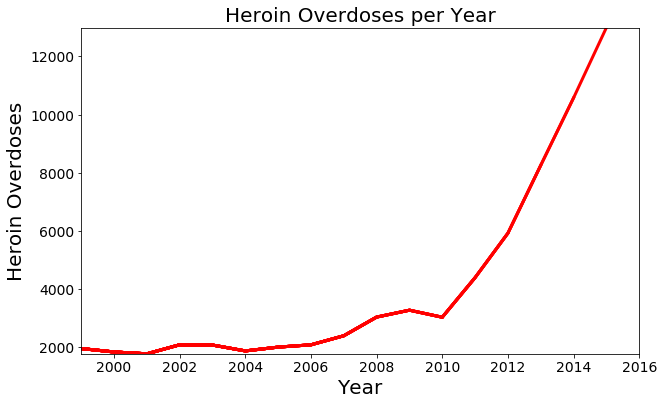

In [9]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=len(overdose[title])/2, metadata=dict(artist='Me'), bitrate=1800)

fig = plt.figure(figsize=(10,6))
plt.xlim(1999, 2016)
plt.ylim(np.min(overdose)[0], np.max(overdose)[0])
plt.xlabel('Year',fontsize=20)
plt.ylabel(title,fontsize=20)
plt.title('Heroin Overdoses per Year',fontsize=20)

def animate(j):
    data = overdose.iloc[:int(j+1)] #select data range
    print(data)
    p = sns.lineplot(x=data.index, y=data[title], data = data, color="r")
    p.tick_params(labelsize=14)
    plt.setp(p.lines,linewidth=3)
    

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(overdose[title]), repeat=True)
ani.save('HeroinOverdosesJumpy.gif', writer='imagemagick', fps=10)